<a href="https://colab.research.google.com/github/Lightola/light-wprk/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [6]:
# Load temperature data
temp = pd.read_csv("/content/temperature.csv")


In [7]:
# Explore Dataset
print(temp.head())
print(temp.info())

              datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   

   Philadelphia    New York    Montreal      Boston   Beersheba  \
0           NaN         NaN         N

In [8]:
# Convert datetime column
temp['datetime'] = pd.to_datetime(temp['datetime'])
temp.set_index('datetime', inplace=True)

# Select a few major cities for analysis
cities = ['New York', 'San Francisco', 'Miami', 'Toronto']

# Convert Kelvin to Celsius
temp_celsius = temp[cities] - 273.15


<ipython-input-9-b9ff04c384a1>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_celsius[city].resample('M').mean().plot(label=city)
<ipython-input-9-b9ff04c384a1>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_celsius[city].resample('M').mean().plot(label=city)
<ipython-input-9-b9ff04c384a1>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_celsius[city].resample('M').mean().plot(label=city)
<ipython-input-9-b9ff04c384a1>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_celsius[city].resample('M').mean().plot(label=city)


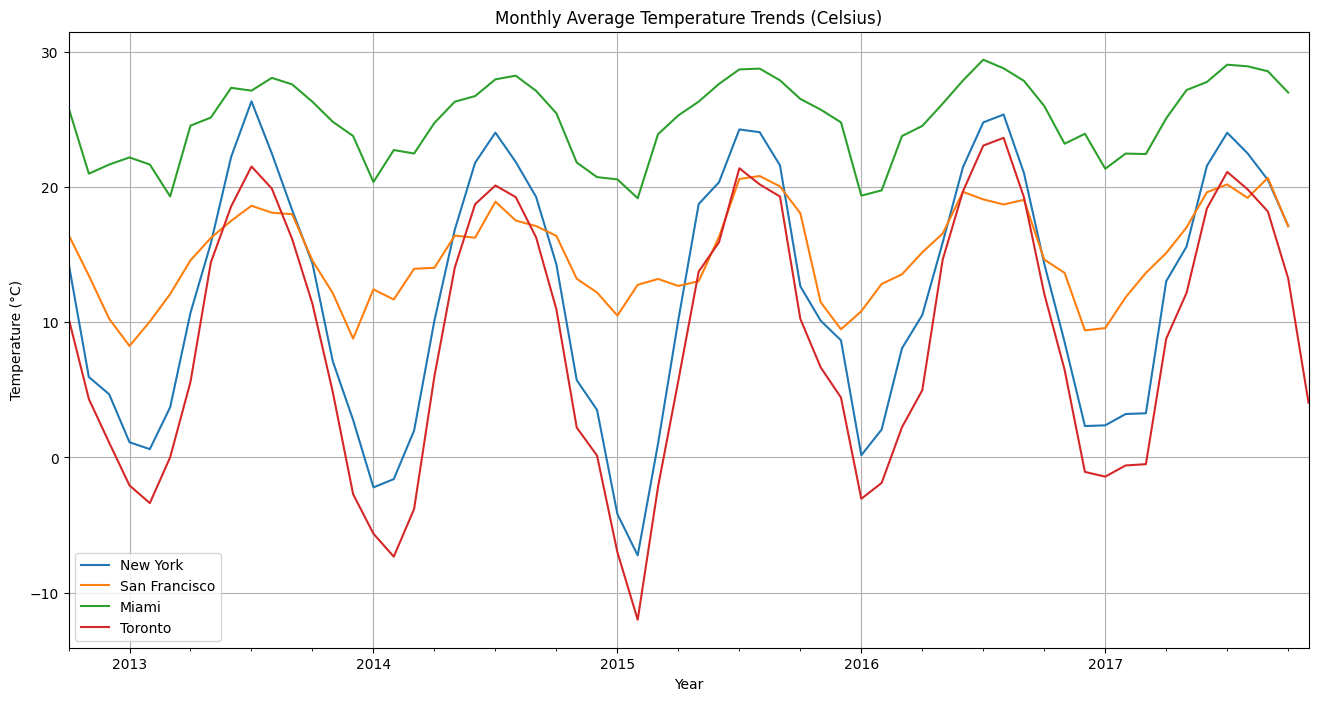

In [9]:
# 1. Plot raw temperature trends
plt.figure(figsize=(16,8))
for city in cities:
    temp_celsius[city].resample('M').mean().plot(label=city)
plt.legend()
plt.title('Monthly Average Temperature Trends (Celsius)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [10]:
# 2. Resample to daily average
daily_temp = temp_celsius.resample('D').mean()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4qwmddd0/u8r92s_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4qwmddd0/0fkjiu4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=500', 'data', 'file=/tmp/tmp4qwmddd0/u8r92s_s.json', 'init=/tmp/tmp4qwmddd0/0fkjiu4z.json', 'output', 'file=/tmp/tmp4qwmddd0/prophet_modelqqrv617c/prophet_model-20250428182240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


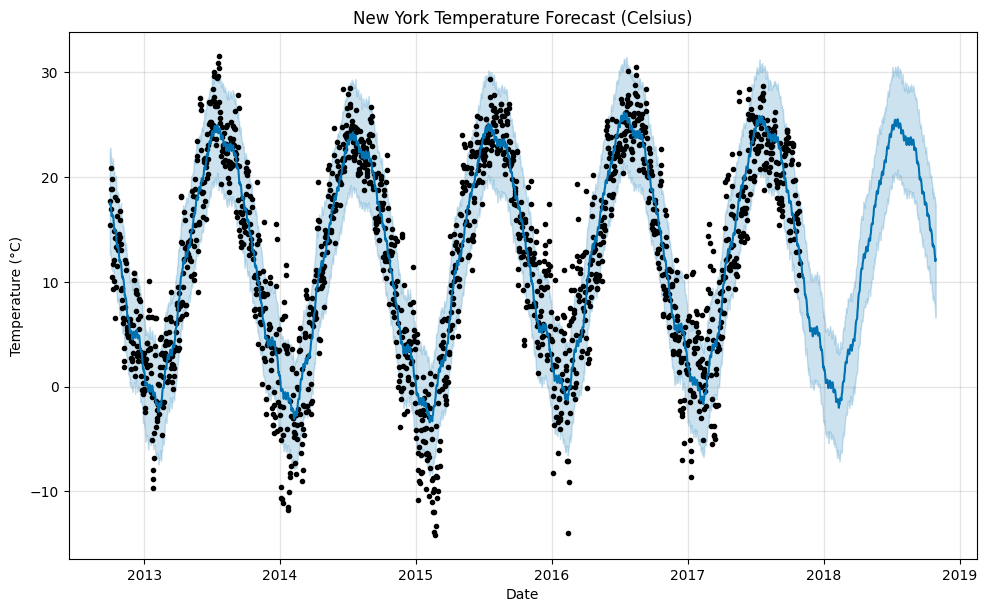

In [11]:
# 3. Example: Forecasting New York Temperature with Prophet
ny_temp = daily_temp['New York'].reset_index()
ny_temp.columns = ['ds', 'y']

# Drop NaNs
ny_temp = ny_temp.dropna()

# Create Prophet model
model = Prophet()
model.fit(ny_temp)

# Create future dataframe (predict next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('New York Temperature Forecast (Celsius)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()


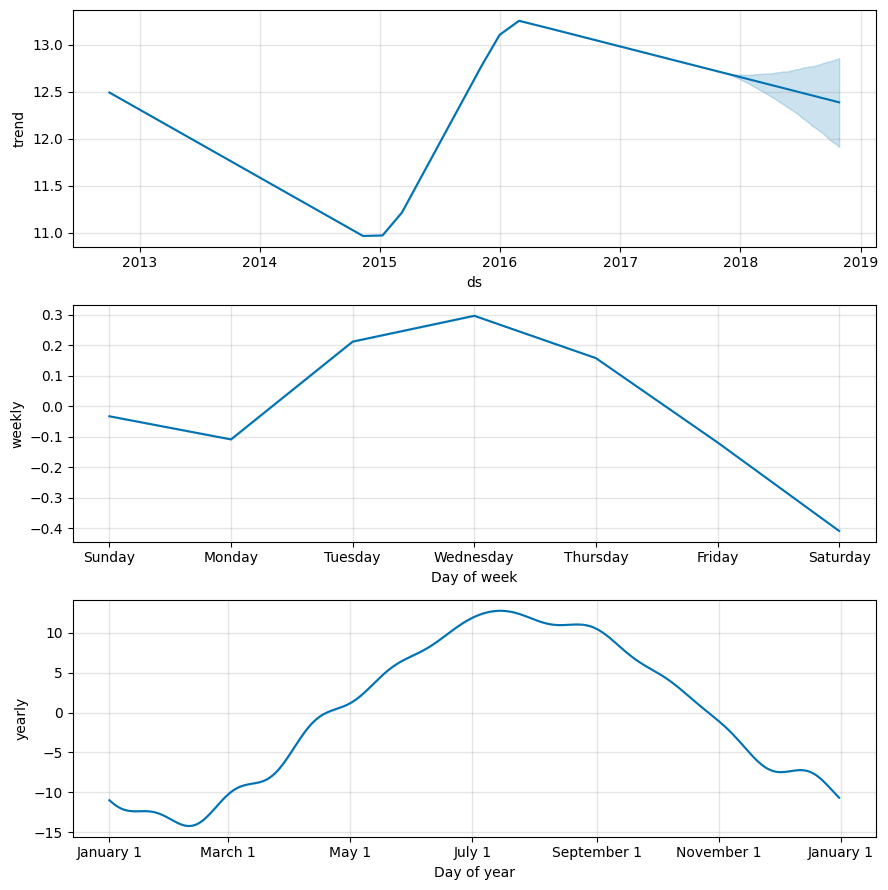

In [12]:
# 4. (Optional) Forecast Components
model.plot_components(forecast)
plt.show()


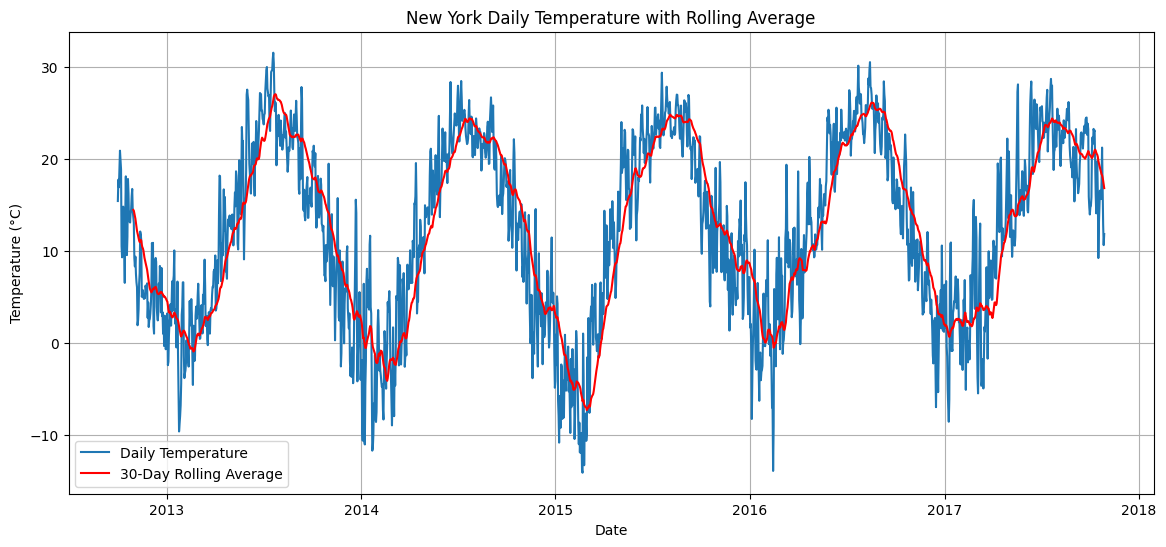

In [13]:
# 5. Trend detection (rolling average)
rolling_avg = daily_temp['New York'].rolling(window=30).mean()

plt.figure(figsize=(14,6))
plt.plot(daily_temp['New York'], label='Daily Temperature')
plt.plot(rolling_avg, color='red', label='30-Day Rolling Average')
plt.title('New York Daily Temperature with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()